In [1]:
# Lab Assignment 05
# The objective of this lab assignment is to process and analyze a dataset of Yelp reviews
# classified by sentiment (positive or negative) (data_lab_05.csv).

In [2]:
# install wordcloud package by running the following command
# in the Anaconda prompt:
# conda install -c conda-forge wordcloud

In [3]:
# install stopwords package
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [5]:
# load the dataset and display the first five rows
data = pd.read_csv('data_lab_05.csv')
data.head()

text  class
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [6]:
# TASK 01: convert text to lowercase using the str.lower() function
data['text'] = data['text'].str.lower()
data.head()

text  class
0                           wow... loved this place.      1
1                                 crust is not good.      0
2          not tasty and the texture was just nasty.      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1

In [7]:
# TASK 02: remove punctuation and special characters (that is, every character
# that is not a letter, a digit, or a whitespace) from text using str.replace()
# HINT: use regular expressions
data['text'] = data['text'].str.replace('[^\w\s]','')
data.head()

text  class
0                               wow loved this place      1
1                                  crust is not good      0
2           not tasty and the texture was just nasty      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1

In [8]:
# print list of stop words
stop_list = stopwords.words('english')
print(stop_list)
print(len(stop_list))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# QUESTION 01: how many stop words are included in this list? List some examples.
# ANSWER: 179

In [10]:
# remove stop words from text
data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_list]))
data.head()

text  class
0                                    wow loved place      1
1                                         crust good      0
2                                tasty texture nasty      0
3  stopped late may bank holiday rick steve recom...      1
4                        selection menu great prices      1

In [11]:
# QUESTION 02: what are the disadvantages of removing these stop words from the text?
# ANSWER: It affected the result of phrase queries, like at index 3, it removed 'by during the'

In [12]:
# perform stemming (reduce words to common form) using nltk.stem.PorterStemmer()
st = PorterStemmer()
data['text'] = data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data.head()

text  class
0                                     wow love place      1
1                                         crust good      0
2                                 tasti textur nasti      0
3  stop late may bank holiday rick steve recommen...      1
4                            select menu great price      1

In [13]:
# split text into tokens (tokenization)
data['tokens'] = data['text'].apply(lambda x: x.split())
data.head()

text  class  \
0                                     wow love place      1   
1                                         crust good      0   
2                                 tasti textur nasti      0   
3  stop late may bank holiday rick steve recommen...      1   
4                            select menu great price      1   

                                              tokens  
0                                 [wow, love, place]  
1                                      [crust, good]  
2                             [tasti, textur, nasti]  
3  [stop, late, may, bank, holiday, rick, steve, ...  
4                       [select, menu, great, price]

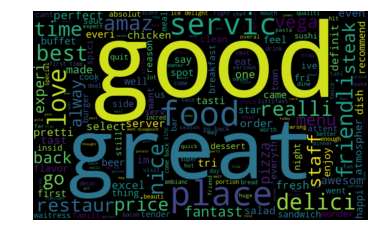

In [14]:
# create word cloud using text from positive reviews
list_words_positive = []
for index, row in data.iterrows():
    if row['class'] == 1:
        list_words_positive.extend(row['tokens'])
all_words = ' '.join(list_words_positive)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

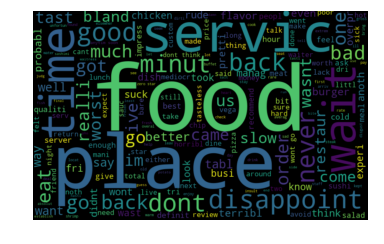

In [15]:
# TASK 03: create word cloud using text from negative reviews
list_words_negative = []
for index, row in data.iterrows():
    if row['class'] == 0:
        list_words_negative.extend(row['tokens'])
all_words = ' '.join(list_words_negative)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
# QUESTION 03: what can you conclude from the word clouds?
# ANSWER: Positive words are used much more than negative words, seeing that 'good' and 'great' are much bigger
# in the positive word cloud then any word in the negative word cloud

In [17]:
# TASK 04: convert text into matrix of word counts
# NOTE: you can also use this function to process the reviews (convert to lowercase,
# remove stop words, etc.).
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(data['text'])

In [18]:
# print all words in count_matrix
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

1629
['10', '100', '1199', '12', '15', '15lb', '17', '1979', '20', '2007', '23', '30', '34th', '35', '40', '400', '40min', '45', '70', '785', '90', 'absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'amazingrg', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arent', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atmosphere1', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri

In [19]:
# QUESTION 04: how many different words are there in the dataset? List some examples.
# ANSWER: There are 1629 different words in the dataset. 
# Some examples are 'ask', 'bacon', and 'cake'.

In [52]:
#TASK 05: print contents of first row and first column of count_matrix
print(count_matrix[0,:])
print(count_matrix[:,0])

  (0, 1074)	1
  (0, 840)	1
  (0, 1608)	1
  (59, 0)	1
  (209, 0)	1
  (376, 0)	1
  (420, 0)	1
  (430, 0)	1


In [21]:
# QUESTION 05: How many words are there in the first review? How many reviews contain the word '10'?
# ANSWER: There are 3 words in the first review. 7 reviews contain the word '10'.

In [22]:
# TASK 06: convert text into term frequency-inverse document frequency matrix
# NOTE: you can also use this function to process the reviews (convert to lowercase,
# remove stop words, etc.).
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text'])

In [54]:
#TASK 07: print contents of first row and first column of tfidf_matrix
print(tfidf_matrix[0,:])
print(tfidf_matrix[:,0])

  (0, 1608)	0.7682465003477824
  (0, 840)	0.5160632498654986
  (0, 1074)	0.37878230798394597
  (59, 0)	0.3428916833970035
  (209, 0)	0.3826230726526059
  (376, 0)	0.3235489794962004
  (420, 0)	0.4205898038666185
  (430, 0)	0.33512598551846573


In [24]:
# QUESTION 06: What is the term frequency-inverse document frequency of the word '10' in the 60th review?
# ANSWER: 1

In [25]:
# OPTIONAL: can you train a classification model to classify the reviews as positive or
# negative using the term frequency-inverse document frequencies as features?